In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

harris_p1 = pd.read_csv('data/Option 1/HarrisPartI.csv')
harris_p2 = pd.read_csv('data/Option 1/HarrisPartII.csv')
harris_p3 = pd.read_csv('data/Option 1/HarrisPartIII.csv')
vandenberg = pd.read_csv('data/Option 1/vandenBerg_table2.csv')
krause = pd.read_csv('data/Option 1/Krause21.csv')

### CSV File Information
#### Harris Part I (Identifications and Positional Data)
- 1 ['ID'] Cluster identification number
- 2 ['Name'] Other commonly used cluster name
- 3,4 ['RA'], ['DEC'] Right ascension and declination (epoch J2000)
- 5,6 ['L'], ['B'] Galactic longitude and latitude (degrees)
- 7 ['R_sun'] Distance from Sun (kiloparsecs)
- 8 ['R_gc'] Distance from Galactic center (kpc), assuming R_0=8.0 kpc
- 9-11 ['X'], ['Y'], ['Z'] Galactic distance components X,Y,Z in kiloparsecs, in a Sun-centered coordinate system; X points toward Galactic center, Y in direction of Galactic rotation, Z toward North Galactic Pole

#### Harris Part II (Metallicity and Photometry)

1. ['ID'] - Cluster identification  
2. ['Fe/H'] - Metallicity [Fe/H]  
3. ['wt'] - Weight of mean metallicity; essentially the number of independent [Fe/H] measurements averaged together  
4. ['E_BV'] - Foreground reddening (E(B-V))  
5. ['V_HB'] - V magnitude level of the horizontal branch (or RR Lyraes)  
6. ['m_MV'] - Apparent visual distance modulus (m-M)V  
7. ['V_t'] - Integrated V magnitude of the cluster  
8. ['M_V_t'] - Absolute visual magnitude (cluster luminosity), M_V,t = V_t - (m-M)V  
9. ['U_B'] - Integrated color index U-B (uncorrected for reddening)  
10. ['B_V'] - Integrated color index B-V (uncorrected for reddening)  
11. ['V_R'] - Integrated color index V-R (uncorrected for reddening)  
12. ['V_I'] - Integrated color index V-I (uncorrected for reddening)  
13. ['spt'] - Spectral type of the integrated cluster light  
14. ['ellip'] - Projected ellipticity of isophotes, e = 1-(b/a)  


#### Harris Part III (Velocities and Structural Parameters)

1. ['ID'] - Cluster identification  
2. ['v_r'] - Heliocentric radial velocity (km/s)  
3. ['v_r_e'] - Observational (internal) uncertainty in radial velocity  
4. ['v_LSR'] - Radial velocity relative to Solar neighborhood LSR  
5. ['sig_v'] - Central velocity dispersion sig_v (km/s)  
6. ['sig_v_e'] - Observational (internal) uncertainty in velocity dispersion  
7. ['c'] - King-model central concentration, c = log(r_t/r_c); a 'c' denotes a core-collapsed cluster  
8. ['r_c'] - Core radius in arcmin  
9. ['r_h'] - Half-light radius in arcmin  
10. ['mu_V'] - Central surface brightness, V magnitudes per square arcsecond  
11. ['rho_0'] - Central luminosity density, log_10(Solar luminosities per cubic parsec)  
12. ['lg_tc'] - Core relaxation time t(r_c), in log_10(years)  
13. ['lg_th'] - Median relaxation time t(r_h), in log_10(years) 

#### Vandenburg

1. ['#NGC'] - NGC cluster identification number  
2. ['Name'] - Other commonly used cluster name  
3. ['FeH'] - Metallicity [Fe/H]  
4. ['Age'] - Age of the cluster  
5. ['Age_err'] - Age uncertainty  
6. ['Method'] - Method used for determining age  
7. ['Figs'] - Figures referenced in the study  
8. ['Range'] - Range of the measurements  
9. ['HBtype'] - Horizontal branch type  
10. ['R_G'] - Distance from Galactic center (kpc)  
11. ['M_V'] - Absolute visual magnitude  
12. ['v_e0'] - Central escape velocity  
13. ['log_sigma_0'] - Central logarithmic velocity dispersion  


<p style=
    "display: flex;
    flex-direction: column; 
    align-items: center;
    text-align: center;"
>
    <img src="images/vandenberg_variables.png" alt="vandenberg_variables" width="600px"/>
    <em>
        <br/>
        Vandenberg variables as shown in https://arxiv.org/pdf/1308.2257
    </em>
</p>

#### Krause

1. ['Class'] - Classification or category of the object  
2. ['Object'] - Object name or identification number  
3. ['AltName'] - Alternative name or designation for the object  
4. ['Mstar'] - Stellar mass (Mstar) of the object  
5. ['rh'] - Half-light radius (rh) of the object  
6. ['C5'] - Compactness parameter (C5) of the object  
7. ['Age'] - Age of the object in billions of years  
8. ['FeH'] - Metallicity of the object, typically measured as [Fe/H]  

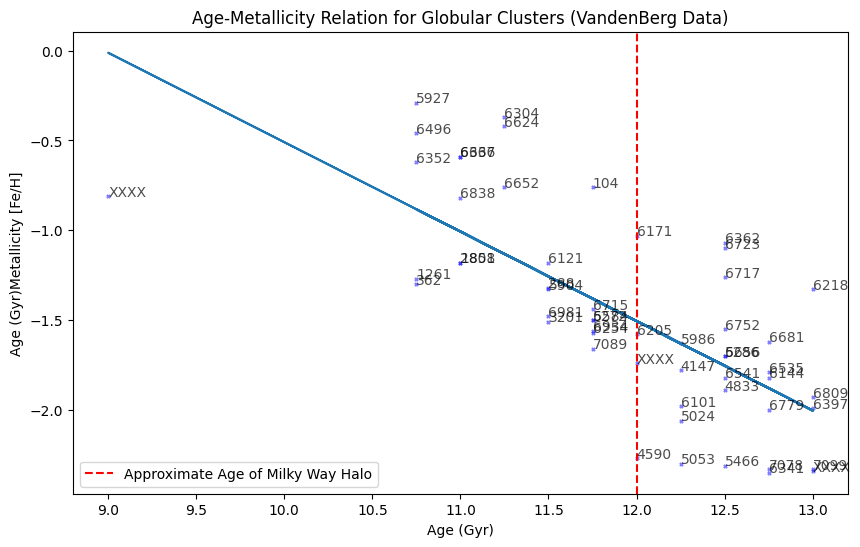

In [9]:
# Extract necessary columns for plotting
metallicities = vandenberg['FeH'].astype(float)
ages = vandenberg['Age'].astype(float)
cluster_ids = vandenberg['#NGC']

# Create a scatter plot for Age-Metallicity Relation
plt.figure(figsize=(10, 6))
plt.scatter(ages, metallicities, marker='x', s=5, color='blue', alpha=0.5)

# Annotate cluster names for reference
for i, id in enumerate(cluster_ids):
    # plt.annotate(id, (metallicities[i], ages[i]), fontsize=10, alpha=0.7)
    plt.annotate(id, (ages[i], metallicities[i]), fontsize=10, alpha=0.7)

# Labeling and formatting the plot
plt.title("Age-Metallicity Relation for Globular Clusters (VandenBerg Data)")
plt.xlabel("Age (Gyr)")
plt.ylabel("Age (Gyr)Metallicity [Fe/H]")
plt.axvline(x=12, color='red', linestyle='--', label="Approximate Age of Milky Way Halo")
plt.legend()
# plt.grid(True)

# Linear regression
reg = stats.linregress(ages, metallicities)
plt.plot(
    ages, reg.slope * ages + reg.intercept,
    label=f'y = {reg.slope:.2f} * x + {reg.slope:.2f}'
)

plt.show()